Purpose of this is to ...

## Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [2]:
#importlib code just for debugging : to allow changes in graphing_config to 
#reflect here. It can be removed if you are not making changes to graphing_config

import importlib ##can remove
import graphing_config as GC
importlib.reload(GC) ##can remove

<module 'graphing_config' from '/gpfs/gibbs/pi/reilly/VariantEffects/scripts/noon_scripts/4.graphs/graphing_config.py'>

## PhyloP VS rarity

First, load the data

In [3]:
path=glob.glob(GC.data_base_path+"phylop_count_table/*.csv")[0]
phylop = pd.read_csv(path)

#### Phylop VS rarity directly

I would like to directly show the number of variants falling into each rarity category, for PhyloP conserved and PhyloP not conserved. 

First, let's make a little function that will make a graph

In [4]:
def plot_count_by_category(df, genomic_region,normalize):
    subset_df=None
    
    if genomic_region=="ALL":
        subset_df=df.groupby(["category","phylop_significant"])["count"].sum().reset_index()
    else:
        subset_df = df[df[genomic_region]].copy()

    
    if normalize:

        # Calculate the total count for each phylop_significant category

        total_counts = subset_df.groupby('phylop_significant')['count'].sum()

        # Normalize the counts by the total counts
        subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['phylop_significant']], axis=1)
        value_col = 'normalized_count'
        ylabel = 'Fraction of Count'
    else:
        value_col = 'count'
        ylabel = 'Count'


    plt.figure(figsize=(10, 6))
    sns.barplot(x='category', y=value_col, hue='phylop_significant', data=subset_df,order=GC.rarity_order)
    plt.title(f"Count per Category Conditioned on Phylop Significant\n({genomic_region} = True)"+f"\n{'Normalized so each phylop_significant sums to 1' if normalize else ''}")
    plt.xticks(rotation=45, ha='right')
    if normalize:
        plt.ylim(0, 0.6)
    plt.ylabel(ylabel)
    plt.show()

Next, let's call that function for all genomic regions of interest, and for both normalized & non-normalized.

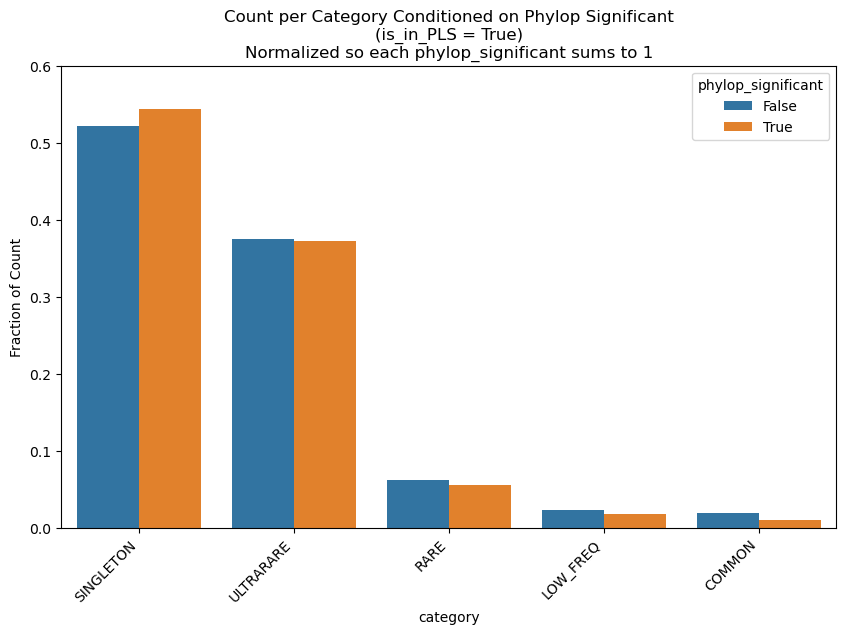

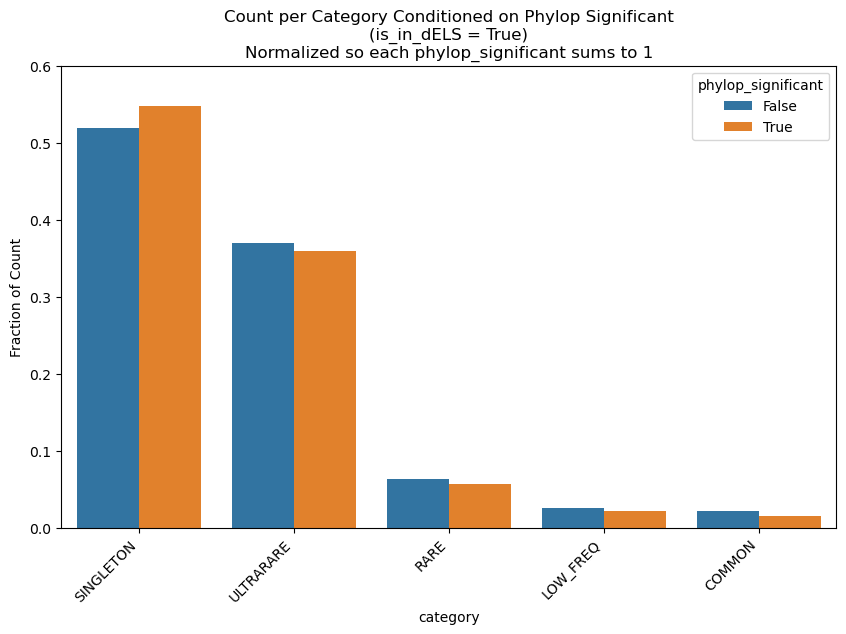

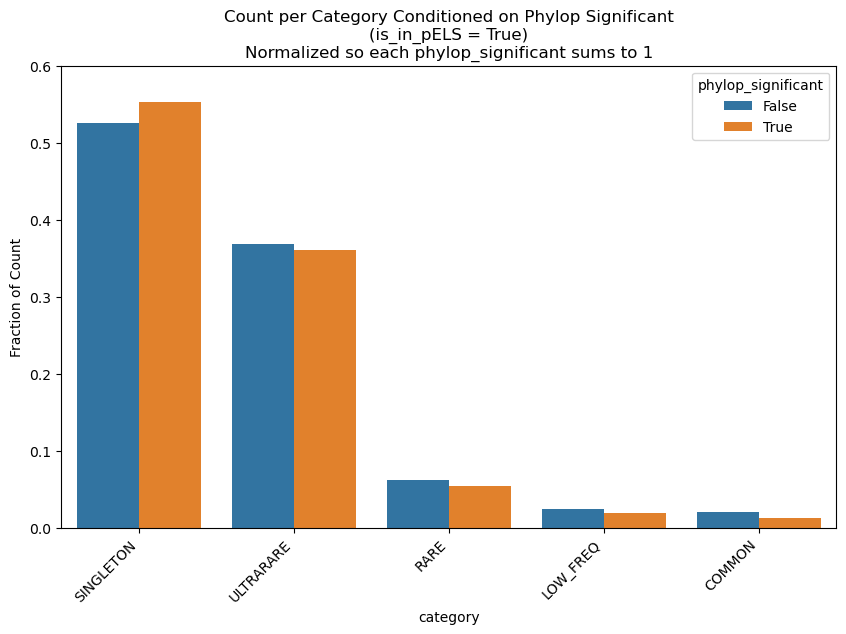

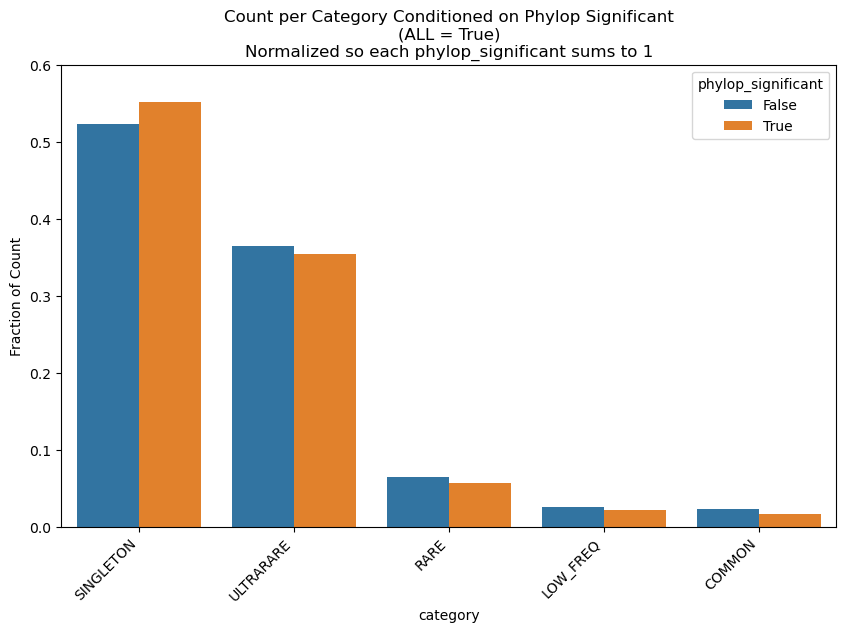

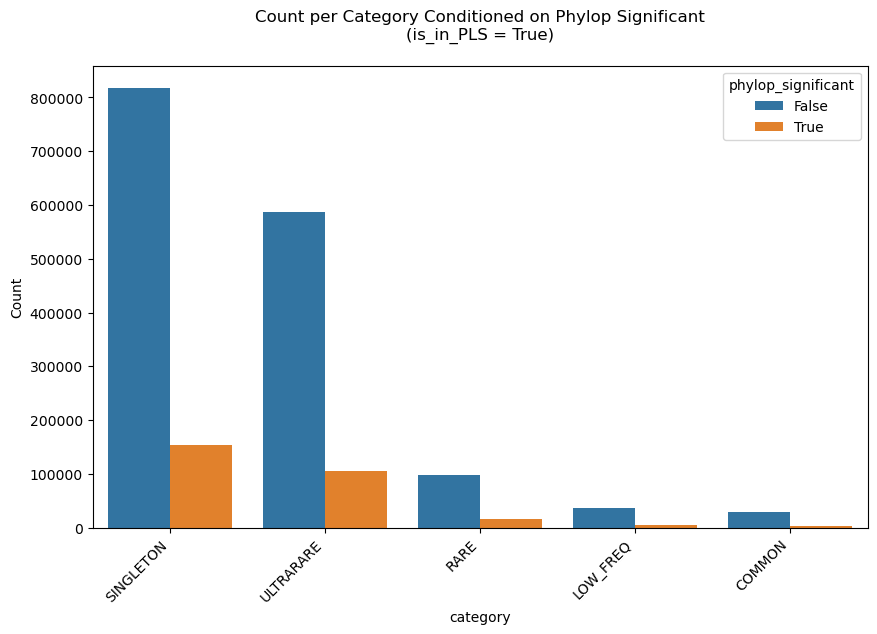

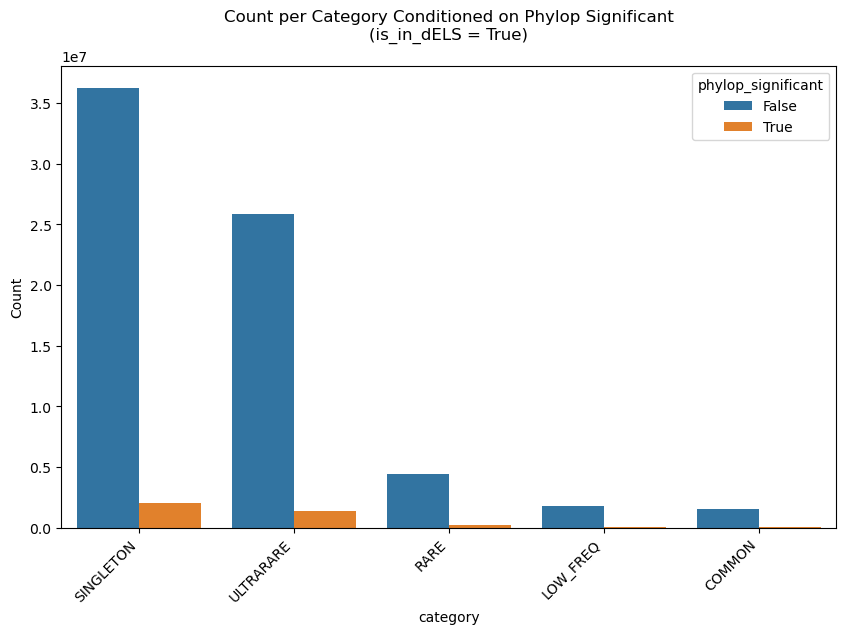

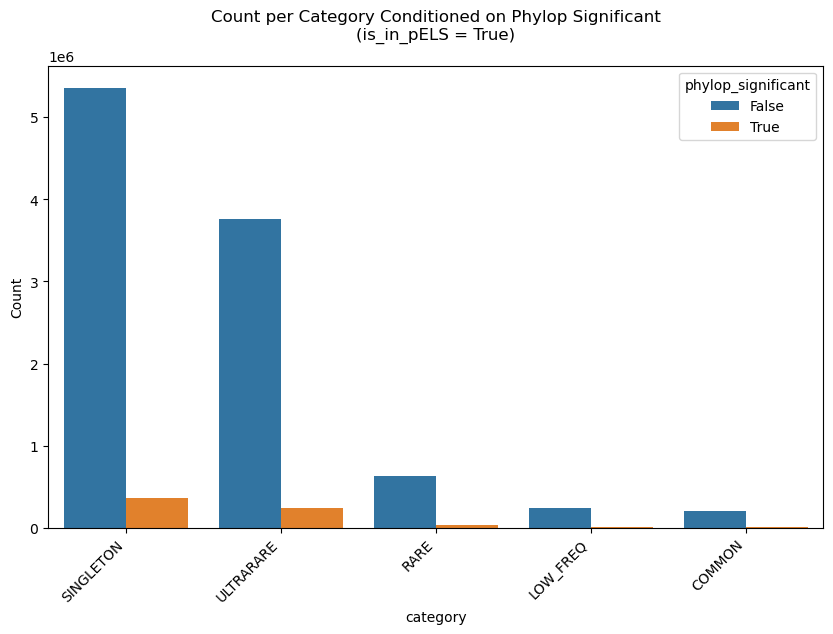

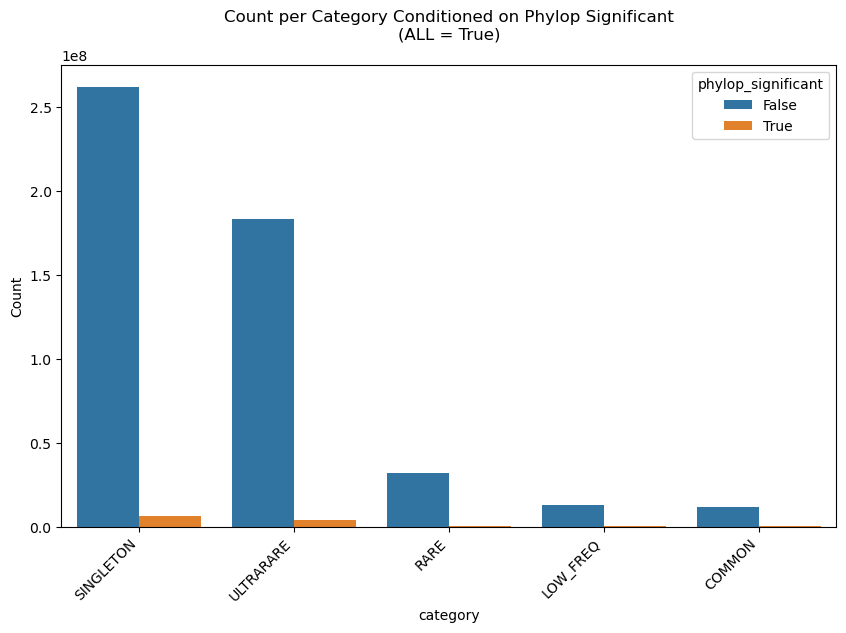

In [5]:
for norm in [True,False]:
    for var in GC.genome_regions:
        plot_count_by_category(phylop, var,norm)

I would like to directly show the number of variants falling into each rarity category, for PhyloP bins
NOT DONE

#### PhyloP VS rarity ratio

I would also like to examine the differences in common/rare variant ratios for PhyloP conserved and not-conserved.

In [6]:
def plot_fraction(df, genomic_region,to_plot):
    if genomic_region=="ALL":
        return#temp
    subset_df = df[df[genomic_region]].copy()
    subset_df["rarity_bin"]=subset_df.apply(GC.lump_rarity_categories,axis=1)
    subset_df=subset_df[subset_df["rarity_bin"]!="not_interesting"]
    total_counts = subset_df.groupby([to_plot,'rarity_bin'])['count'].sum().unstack()
    total_counts["ratio"]=total_counts["RARE"]/total_counts["COMMON"]
    plt.figure(figsize=(5, 5))
    sns.barplot(total_counts,y="ratio",x=to_plot)
    plt.xticks(rotation=45)
    plt.title(genomic_region)
    plt.show()

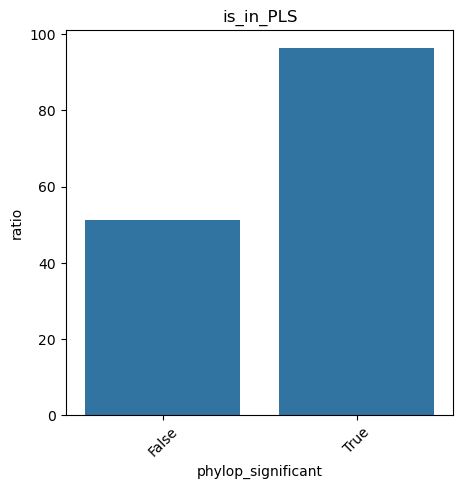

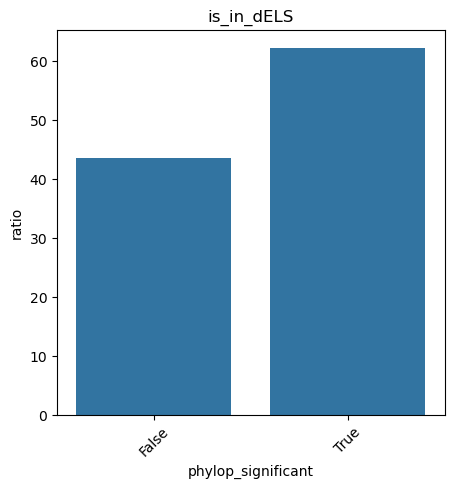

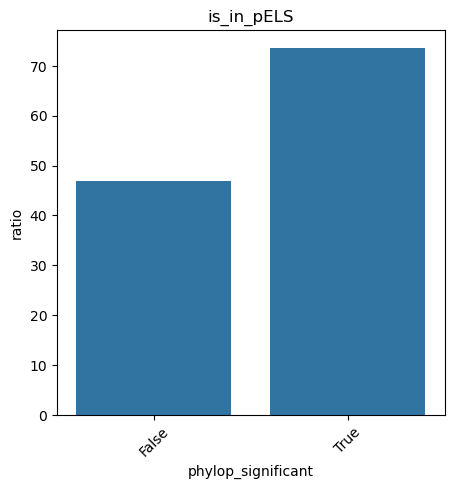

In [7]:
for var in GC.genome_regions:
    plot_fraction(phylop, var,"phylop_significant")